In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0.준비

In [3]:
import pandas as pd

In [4]:
train = pd.read_csv('/content/drive/MyDrive/data/여행상품신청/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data/여행상품신청/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/data/여행상품신청/sample_submission.csv')

- id : 샘플 아이디
- Age : 나이
- TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
- CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 
- DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
- Occupation : 직업
- Gender : 성별
- NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
- NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
- ProductPitched : 영업 사원이 제시한 상품
- PreferredPropertyStar : 선호 호텔 숙박업소 등급
- MaritalStatus : 결혼여부
- NumberOfTrips : 평균 연간 여행 횟수
- Passport : 여권 보유 여부 (0: 없음, 1: 있음)
- PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
- OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
- NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
- Designation : (직업의) 직급
- MonthlyIncome : 월 급여
- ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)

In [5]:
train

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


## 데이터 전처리

### 결측치 처리

In [6]:
train.isna().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [7]:
def handle_na(data):
    temp = data.copy()
    for col, dtype in temp.dtypes.items():
        if dtype == 'object':
            # 문자형 칼럼의 경우 'Unknown'을 채워줍니다.
            value = 'Unknown'
        elif dtype == int or dtype == float:
            # 수치형 칼럼의 경우 0을 채워줍니다.
            value = 0
        temp.loc[:,col] = temp[col].fillna(value)
    return temp

train_nona = handle_na(train)

# 결측치 처리가 잘 되었는지 확인해 줍니다.
train_nona.isna().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

### 문자형 변수 전처리

In [8]:
object_columns = train_nona.columns[train_nona.dtypes == 'object']
print('object 칼럼은 다음과 같습니다 : ', list(object_columns))

# 해당 칼럼만 보아서 봅시다
train_nona[object_columns]

object 칼럼은 다음과 같습니다 :  ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Company Invited,Small Business,Male,Basic,Married,Executive
1,Self Enquiry,Small Business,Female,Deluxe,Single,Manager
2,Company Invited,Salaried,Male,Deluxe,Married,Manager
3,Company Invited,Small Business,Male,Basic,Married,Executive
4,Self Enquiry,Salaried,Male,Deluxe,Divorced,Manager
...,...,...,...,...,...,...
1950,Self Enquiry,Small Business,Male,Basic,Single,Executive
1951,Self Enquiry,Salaried,Female,Super Deluxe,Divorced,AVP
1952,Company Invited,Small Business,Female,Basic,Divorced,Executive
1953,Self Enquiry,Small Business,Female,Deluxe,Married,Manager


In [9]:
train_nona['Occupation'].unique()

array(['Small Business', 'Salaried', 'Large Business', 'Free Lancer'],
      dtype=object)

In [10]:
train_nona['ProductPitched'].unique()

array(['Basic', 'Deluxe', 'King', 'Standard', 'Super Deluxe'],
      dtype=object)

In [11]:
train_nona['Designation'].unique()

array(['Executive', 'Manager', 'VP', 'Senior Manager', 'AVP'],
      dtype=object)

In [12]:
train_nona['MaritalStatus'].unique()

array(['Married', 'Single', 'Divorced', 'Unmarried'], dtype=object)

In [13]:
train_nona['Gender'].value_counts()

Male       1207
Female      692
Fe Male      56
Name: Gender, dtype: int64

In [14]:
train_nona.loc[train_nona['Gender']=='Fe Male','Gender'] = 'Female'
test.loc[test['Gender']=='Fe Male','Gender'] = 'Female'
train_nona['Gender'].value_counts()

Male      1207
Female     748
Name: Gender, dtype: int64

In [15]:
# LabelEncoder를 준비해줍니다.
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# LabelEcoder는 학습하는 과정을 필요로 합니다.
encoder.fit(train_nona['TypeofContact'])

#학습된 encoder를 사용하여 문자형 변수를 숫자로 변환해줍니다.
encoder.transform(train_nona['TypeofContact'])

array([0, 1, 0, ..., 0, 1, 0])

In [16]:
train_enc = train_nona.copy()

# 모든 문자형 변수에 대해 encoder를 적용합니다.
for o_col in object_columns:
    encoder = LabelEncoder()
    encoder.fit(train_enc[o_col])
    train_enc[o_col] = encoder.transform(train_enc[o_col])

# 결과를 확인합니다.
train_enc

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,0,1,10.0,3,1,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.0,0
1,2,34.0,1,3,0.0,3,0,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.0,1
2,3,45.0,0,1,0.0,2,1,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,0.0,0
3,4,29.0,0,1,7.0,3,1,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.0,1
4,5,42.0,1,3,6.0,2,1,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,1,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.0,0
1951,1952,41.0,1,3,8.0,2,0,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.0,0
1952,1953,38.0,0,3,28.0,3,0,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.0,0
1953,1954,28.0,1,3,30.0,3,0,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,22218.0,0


In [17]:
# 결측치 처리
test = handle_na(test)

# 문자형 변수 전처리
for o_col in object_columns:
    encoder = LabelEncoder()
    
    # test 데이터를 이용해 encoder를 학습하는 것은 Data Leakage 입니다! 조심!
    encoder.fit(train_nona[o_col])
    
    # test 데이터는 오로지 transform 에서만 사용되어야 합니다.
    test[o_col] = encoder.transform(test[o_col])

# 결과를 확인합니다.
test

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,0,3,0.0,3,1,2,5.0,1,3.0,1,1.0,0,2,0,1.0,2,19668.0
1,2,46.0,1,2,11.0,3,1,3,0.0,1,4.0,1,1.0,1,5,0,1.0,2,20021.0
2,3,37.0,1,3,22.0,3,1,3,4.0,1,3.0,1,5.0,0,5,1,0.0,2,21334.0
3,4,43.0,1,1,36.0,3,1,3,6.0,1,3.0,3,6.0,0,3,1,2.0,2,22950.0
4,5,25.0,1,3,7.0,1,0,4,4.0,0,4.0,3,3.0,1,4,1,3.0,1,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,1,1,6.0,3,0,2,3.0,4,3.0,2,7.0,0,4,1,1.0,0,32328.0
2929,2930,33.0,1,1,9.0,3,0,4,2.0,1,3.0,3,2.0,0,3,0,1.0,2,23733.0
2930,2931,33.0,0,1,31.0,2,1,4,4.0,1,3.0,0,3.0,0,4,1,1.0,2,23987.0
2931,2932,26.0,1,1,9.0,3,1,4,2.0,0,5.0,3,2.0,0,2,1,3.0,1,22102.0


# 1.EDA

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## target

([<matplotlib.axis.XTick at 0x7f44ec1bead0>,
 [Text(0, 0, 'not application'), Text(0, 0, 'application')])

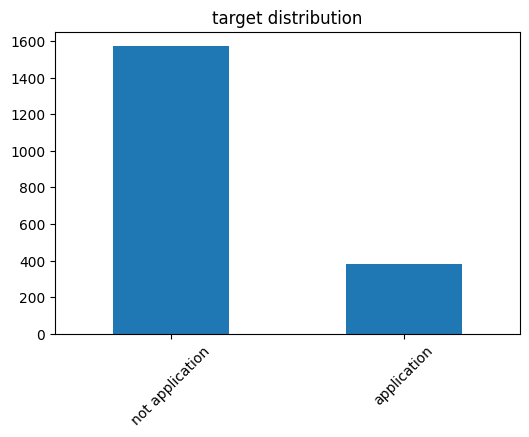

In [19]:
plt.figure(dpi=100)
train_enc['ProdTaken'].value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xticks(np.arange(2),labels = ['not application','application'],rotation=45)

## feature & target

### Feature correlatoin(feature importances)

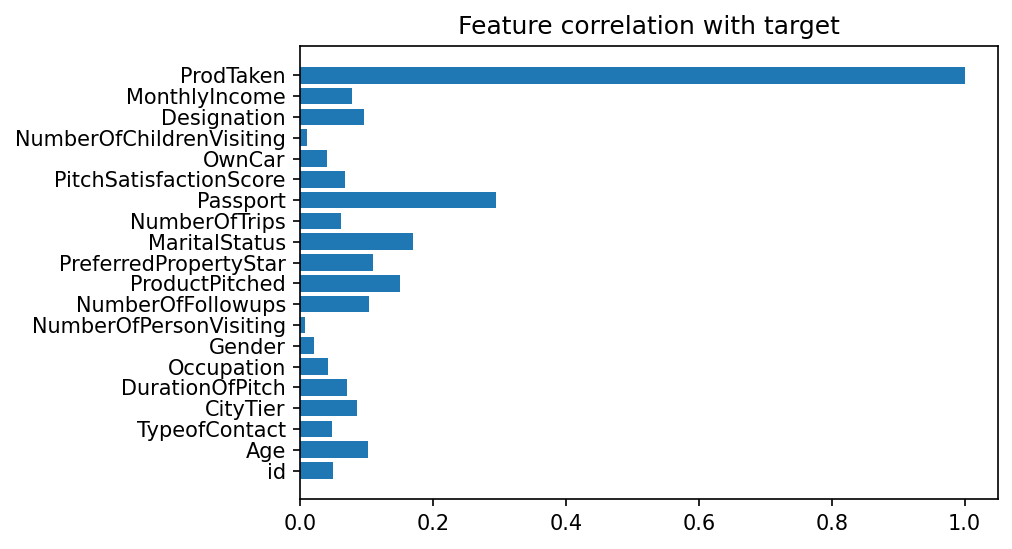

In [20]:
y = np.arange(len(train_enc.corr()['ProdTaken'].values))
ind = train_enc.corr()['ProdTaken'].index

values = abs(train_enc.corr()['ProdTaken'].values)

plt.figure(dpi=150)

plt.title('Feature correlation with target')
plt.barh(y,values)
plt.yticks(y,ind)

plt.show()

### CityTier~target

In [21]:
train_enc.groupby(['CityTier','ProdTaken'])['id'].count()

CityTier  ProdTaken
1         0            1065
          1             218
2         0              66
          1              24
3         0             441
          1             141
Name: id, dtype: int64

In [22]:
temp = train_enc.groupby(['CityTier','ProdTaken'])['id'].count().values
temp

array([1065,  218,   66,   24,  441,  141])

In [23]:
no_application = temp[[0,2,4]]
application = temp[[1,3,5]]
alpha = 0.5
no_application

array([1065,   66,  441])

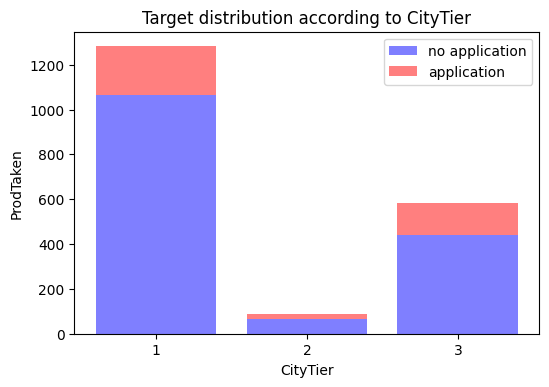

In [24]:
plt.figure(dpi=100)
p1 = plt.bar(np.arange(3), no_application, color='b', alpha=alpha)
p2 = plt.bar(np.arange(3), application, color='r', alpha=alpha,bottom=no_application) # stacked bar chart

plt.title('Target distribution according to CityTier')
plt.xlabel('CityTier')
plt.ylabel('ProdTaken')
plt.xticks(np.arange(3),labels=[1,2,3])
plt.legend((p1[0],p2[0]),('no application','application'))
plt.show()

### Passport~target

In [25]:
train_enc.groupby(['Passport','ProdTaken'])['id'].count()

Passport  ProdTaken
0         0            1218
          1             168
1         0             354
          1             215
Name: id, dtype: int64

In [26]:
temp = train_enc.groupby(['Passport','ProdTaken'])['id'].count().values
temp

array([1218,  168,  354,  215])

In [27]:
no_application = temp[[0,2]]
application = temp[[1,3]]
alpha = 0.5
no_application

array([1218,  354])

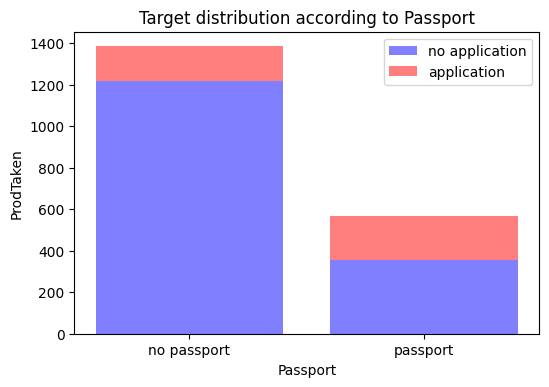

In [28]:
plt.figure(dpi=100)
p1 = plt.bar(np.arange(2), no_application, color='b', alpha=alpha)
p2 = plt.bar(np.arange(2), application, color='r', alpha=alpha,bottom=no_application) # stacked bar chart

plt.title('Target distribution according to Passport')
plt.xlabel('Passport')
plt.ylabel('ProdTaken')
plt.xticks(np.arange(2),labels=['no passport','passport'])
plt.legend((p1[0],p2[0]),('no application','application'))
plt.show()

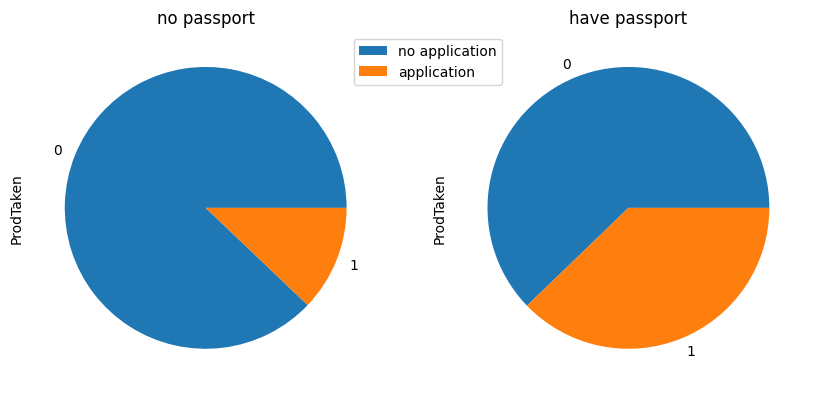

In [29]:
fig=plt.figure(figsize=(10,10), dpi=100)
(ax1, ax2)=fig.subplots(1,2).flatten()

temp = train_enc[train_enc['Passport']==0].reset_index(drop = True)
x = temp['ProdTaken'].value_counts()
x.plot.pie(ax=ax1)
_=ax1.set_title('no passport')
ax1.legend(bbox_to_anchor=(0.9, 1), loc=2,labels=['no application','application'])

temp = train_enc[train_enc['Passport']==1].reset_index(drop = True)
x = temp['ProdTaken'].value_counts()
x.plot.pie(ax=ax2)
_=ax2.set_title('have passport')


plt.show()

### new feature (fail)

In [30]:
train_enc['children percent'] = train_enc['NumberOfChildrenVisiting'] / train_enc['NumberOfPersonVisiting']
train_enc.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken,children percent
0,1,28.0,0,1,10.0,3,1,3,4.0,0,...,1,3.0,0,1,0,1.0,1,20384.0,0,0.333333
1,2,34.0,1,3,0.0,3,0,2,4.0,1,...,2,1.0,1,5,1,0.0,2,19599.0,1,0.000000
2,3,45.0,0,1,0.0,2,1,2,3.0,1,...,1,2.0,0,4,1,0.0,2,0.0,0,0.000000
3,4,29.0,0,1,7.0,3,1,3,5.0,0,...,1,3.0,0,4,0,1.0,1,21274.0,1,0.333333
4,5,42.0,1,3,6.0,2,1,2,3.0,1,...,0,2.0,0,3,1,0.0,2,19907.0,0,0.000000


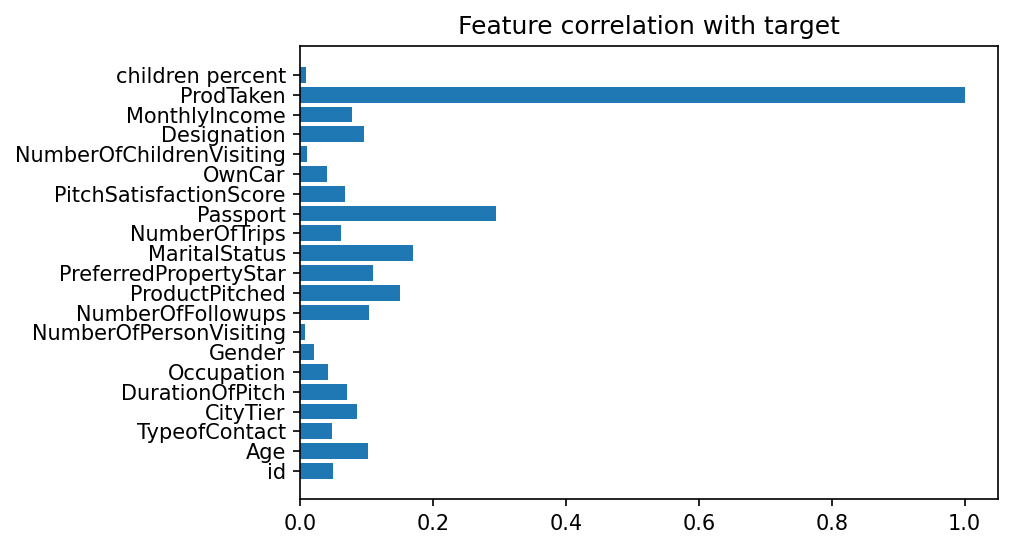

In [31]:
y = np.arange(len(train_enc.corr()['ProdTaken'].values))
ind = train_enc.corr()['ProdTaken'].index

values = abs(train_enc.corr()['ProdTaken'].values)

plt.figure(dpi=150)

plt.title('Feature correlation with target')
plt.barh(y,values)
plt.yticks(y,ind)

plt.show()

In [32]:
train_enc = train_enc.drop(['children percent'],axis=1)

### MaritalStatus~target

In [33]:
train_nona['MaritalStatus'].value_counts()

Married      949
Divorced     375
Single       349
Unmarried    282
Name: MaritalStatus, dtype: int64

In [34]:
train_enc['MaritalStatus'].value_counts()

1    949
0    375
2    349
3    282
Name: MaritalStatus, dtype: int64

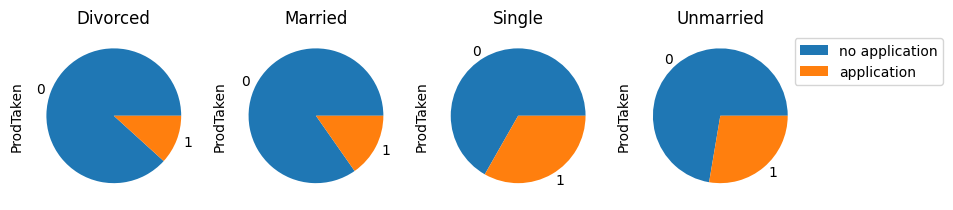

In [35]:
fig=plt.figure(figsize=(10,10), dpi=100)
(ax1, ax2,ax3,ax4)=fig.subplots(1,4).flatten()

temp = train_enc[train_enc['MaritalStatus']==0].reset_index(drop = True)
x = temp['ProdTaken'].value_counts()
x.plot.pie(ax=ax1)
_=ax1.set_title('Divorced')


temp = train_enc[train_enc['MaritalStatus']==1].reset_index(drop = True)
x = temp['ProdTaken'].value_counts()
x.plot.pie(ax=ax2)
_=ax2.set_title('Married')

temp = train_enc[train_enc['MaritalStatus']==2].reset_index(drop = True)
x = temp['ProdTaken'].value_counts()
x.plot.pie(ax=ax3)
_=ax3.set_title('Single')

temp = train_enc[train_enc['MaritalStatus']==3].reset_index(drop = True)
x = temp['ProdTaken'].value_counts()
x.plot.pie(ax=ax4)
_=ax4.set_title('Unmarried')
ax4.legend(bbox_to_anchor=(0.9, 1), loc=2,labels=['no application','application'])
plt.show() 

### CityTier~MonthlyIncome

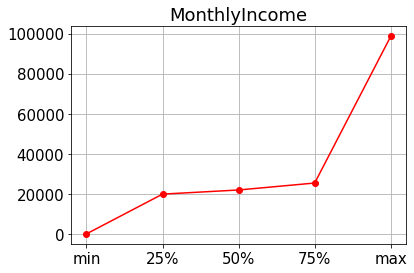

In [36]:
plt.rcParams['font.size'] = 15
data = train_enc.describe().loc['min':'max', 'MonthlyIncome']

plt.title('MonthlyIncome')
plt.plot(data, color = 'red', marker = 'o')
plt.grid(True)

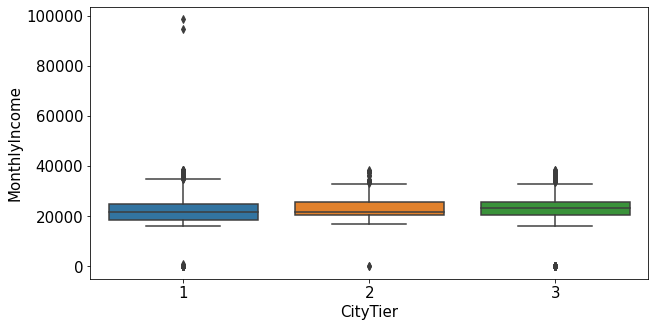

In [50]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train_nona, x="CityTier", y="MonthlyIncome")

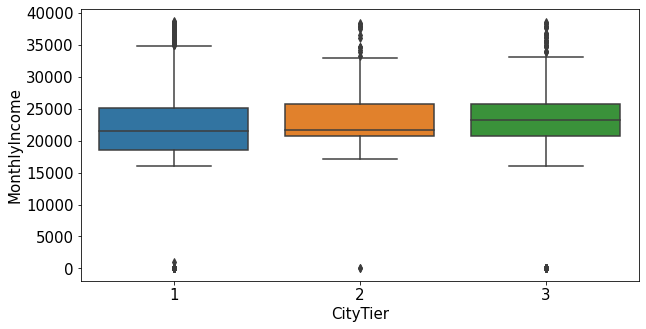

In [51]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train_nona[train_nona['MonthlyIncome']<60000], x="CityTier", y="MonthlyIncome")

### Designation~ MonthlyIncome

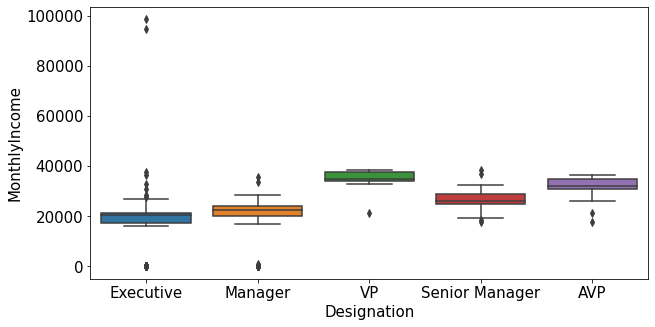

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train_nona, x="Designation", y="MonthlyIncome")

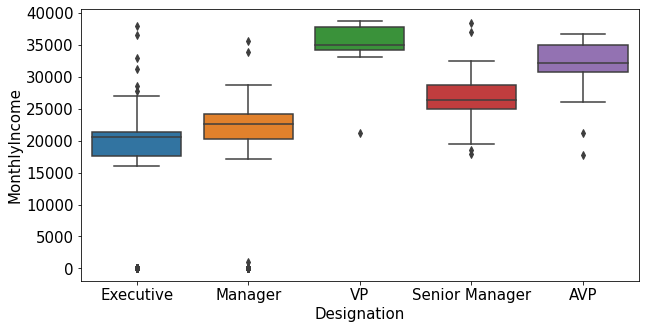

In [48]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train_nona[train_nona['MonthlyIncome']<60000], x="Designation", y="MonthlyIncome")

- MonthlyIncome의 이상치는 특정한 도시 등급과 직급에서 발견됨.

### 가설1

- 여행패키지 신청여부(target)는 고객의 재산과 관련된 feature와 상관관계가 있을 것이다.
- 각 재산과 관련된 feature는 상관관계가 있을 것이다. ex) 차 유무와 직급

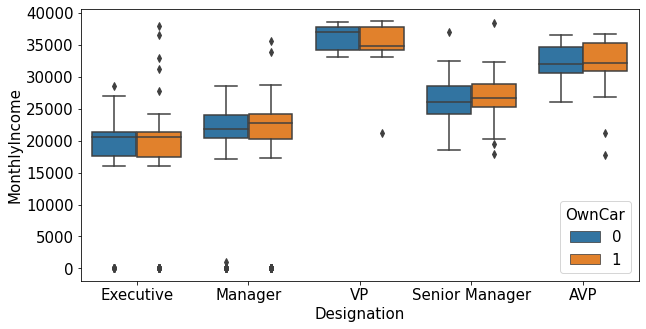

In [47]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train_nona[train_nona['MonthlyIncome']<60000], x="Designation", y="MonthlyIncome",hue='OwnCar')